## Cost Function

For linear regression, the cost function is SSE (sum of the squared errors).

$$\sum(y - \hat{y})^2$$

Vectorized, SSE becomes:

$$J(w) = ||y-Xw||_2^2$$

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

## X values
X = np.arange(-500, 500, 4)

## a true f: oracle
y = 10 + X + np.random.normal(scale = 20, size =(X.shape[0]))

In [ ]:
df = pd.DataFrame({'x1' : X, 'y' : y})

<Axes: xlabel='x1', ylabel='y'>

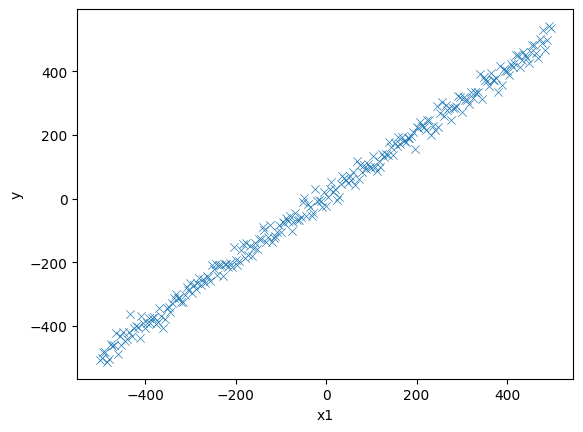

In [ ]:
## scatter plot
sns.scatterplot(df, x = 'x1', y = 'y', marker = "x")

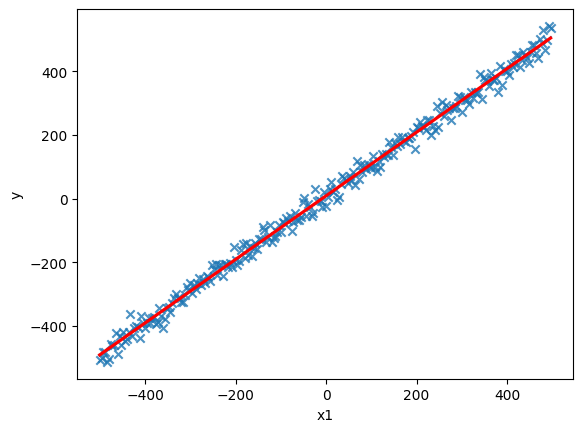

In [ ]:
## plot with a regression
sns.regplot(df, x = 'x1', y = 'y', marker = 'x', line_kws = dict(color = "r"));

## **Matrix Notation on Regression**

Everything is vectorized for speed.

* Numpy: vectorization works at C speed
* Tensorflow: works at C speed, parallel computing on CPU, GPU, the gradient of any matrix is computed automatically.

In [ ]:
## y vector
type(y) ## ok

numpy.ndarray

In [ ]:
## X matrix (x values + added column of 1s)
X1 = np.vstack((np.ones(X.shape[0]), X)).T

In [ ]:
X1.shape

(250, 2)

## The Predictions Using Matrix Notation

$$\hat{y} = Xw$$

but we need the estimate vector. For this problem w = [b0 b1].

In [ ]:
w = np.array([-2, 1.5]) ## suppose this is your weight vector  ## 10, 1

In [ ]:
w = w.reshape(-1,1)

In [ ]:
w.shape

(2, 1)

In [ ]:
## X.dot(w) is going to be your prediction vector
yhat = X1.dot(w)

In [ ]:
## np.dot(X1, w)
yhat = np.dot(X1, w)

## **The Error (Residual) Vector**

Computes the error of the model:


$$ e = y - Xw $$

In [ ]:
X1.dot(w).shape

(250, 1)

In [ ]:
## residual vector
e = y.reshape(-1,1) - (X1.dot(w))

In [ ]:
e.shape

(250, 1)

## The Cost Function

The sum of the residuals squared. The dot product of the vector e does both the sum and the squared.

$$J(w) = e^\top e$$

or

$$J(w) = (y - Xw)^\top (y - Xw)$$

In [ ]:
## this is J(w)  cost function
e.T.dot(e)

array([[5331588.55754439]])

In [ ]:
## Also can be this
## all numpy
(y.reshape(-1,1) - (X1.dot(w))).T.dot(y.reshape(-1,1) - (X1.dot(w)))

In [ ]:
## if we do the norm (even faster in computations)
## l2 norm of the error vector
np.linalg.norm(e)**2

5331588.557544384

## **Gradient of Cost Function**

This what we have to get to be zero.

$$2X^\top(Xw -y)$$

## **Solving for w**

We get the values of the estimates with the cost equal to zero.

In [ ]:
y = y.reshape(-1,1)

In [ ]:
w = np.linalg.inv(X1.T.dot(X1)).dot(X1.T.dot(y))

In [ ]:
w

array([[11.18296006],
       [ 1.00085037]])